# Let's look at some questions!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel('data/Spatial.xlsx')

## Descriptive statistics

**Introduction**

There is a commonly held belief that the younger you are the more easily you can absorb new material. In fact we are used to parents or grandparents being forgetful “having a senior moment”. In order to investigate this for a particular kind of memory, spatial, an investigation has been carried out to test the spatial memory of two groups of people, designated as Elderly (over 65) and Young (20-25). In the test, 18 objects were arranged randomly on a 10x 10 grid. Participants were allowed to examine the positions of the objects for as long as they liked and were subsequently asked to recall these positions by replacing the objects on the grid. Their study times and two measures of performance – the number positioned correctly and the error in positioning - are recorded.


The worksheet contains 6 columns of data:-
- A: Age group, defined as Elderly or Young.
- B: Identification number for each subject within the age groups.
- C: Number of objects correctly replaced (out of 18).
- D: Percentage of objects correctly replaced.
- E: City Block Score – a measurement of the errors between the target and actual positions.
- F: Study time – the time each individual spent examining the positions of the objects

### Q1: Describe the differences between the Elderly and Young age groups in the average times they took to study the grid.

In [3]:
# Filter the DataFrame to select only the 'Elderly' and 'Young' age groups
elderly_group = df[df['Age group'] == 'Elderly']
young_group = df[df['Age group'] == 'Young']

# Calculate the mean study time for each group
mean_study_time_elderly = elderly_group['Study time'].mean()
mean_study_time_young = young_group['Study time'].mean()

# Calculate the median study time for each group
median_study_time_elderly = elderly_group['Study time'].median()
median_study_time_young = young_group['Study time'].median()

# Print the mean and median for both groups
print("Elderly Group:")
print(f"Mean Study Time: {mean_study_time_elderly}")
print(f"Median Study Time: {median_study_time_elderly}")
print("\nYoung Group:")
print(f"Mean Study Time: {mean_study_time_young}")
print(f"Median Study Time: {median_study_time_young}")


Elderly Group:
Mean Study Time: 50.714285714285715
Median Study Time: 42.5

Young Group:
Mean Study Time: 98.84615384615384
Median Study Time: 95.0


The mean and median values of the Study times of the Young group (98.85 and 95.00 respectively) are much greater than those of the Elderly group (50.71 and 42.50 respectively). The mean and median values for the Young groups are close, those for the Elderly group quite different.

### Q2. Describe the differences between the Elderly and Young age groups in variability of the times they took to study the grid.

In [11]:
# # Filter the DataFrame to select only the 'Elderly' and 'Young' age groups
# elderly_group = df[df['Age group'] == 'Elderly']
# young_group = df[df['Age group'] == 'Young']

# Calculate the standard deviation for each group
std_deviation_elderly = elderly_group['Study time'].std()
std_deviation_young = young_group['Study time'].std()

# Calculate the inter-quartile range (IQR) for each group
iqr_elderly = np.percentile(elderly_group['Study time'], 75) - np.percentile(elderly_group['Study time'], 25)
iqr_young = np.percentile(young_group['Study time'], 75) - np.percentile(young_group['Study time'], 25)

# Define a threshold for outliers (e.g., values more than 1.96 times the IQR)
outlier_threshold = 1.5

# Check for outliers in each group
outliers_elderly = elderly_group[(elderly_group['Study time'] < np.percentile(elderly_group['Study time'], 25) - outlier_threshold * iqr_elderly) | (elderly_group['Study time'] > np.percentile(elderly_group['Study time'], 75) + outlier_threshold * iqr_elderly)]
outliers_young = young_group[(young_group['Study time'] < np.percentile(young_group['Study time'], 25) - outlier_threshold * iqr_young) | (young_group['Study time'] > np.percentile(young_group['Study time'], 75) + outlier_threshold * iqr_young)]

# Print the results
print("Elderly Group:")
print(f"Standard Deviation: {std_deviation_elderly}")
print(f"IQR: {iqr_elderly}")
if not outliers_elderly.empty:
    print(f"Outliers: {outliers_elderly}")

print("\nYoung Group:")
print(f"Standard Deviation: {std_deviation_young}")
print(f"IQR: {iqr_young}")
if not outliers_young.empty:
    print(f"Outliers: {outliers_young}")

Elderly Group:
Standard Deviation: 22.519832529192065
IQR: 18.75
Outliers:    Age group  Subject  No. correct  % correct  City block score  Study time
1    Elderly        2            8       44.4                15          90
11   Elderly       12            8       44.4                22         100

Young Group:
Standard Deviation: 29.661552425786695
IQR: 40.0


All the measures of variability are greater for the Young group than for the Elderly. From the table the standard deviation for the Young is 29.66, whilst for the Elderly it is 22.52. The inter-quartile range and range are both greater for the Young group than for the Elderly. Further, the two groups are very different in their study times as the inter-quartile ranges do not overlap and the median value for the Young group would be an outlier for the Elderly group. The Elderly group has an outlier at 100 seconds; there are no outliers in the Young group.

### Q3. Describe the differences between the Elderly and Young age groups in the measures of performance.

In [5]:
# # Filter the DataFrame to select only the 'Elderly' and 'Young' age groups
# elderly_group = df[df['Age group'] == 'Elderly']
# young_group = df[df['Age group'] == 'Young']

# Define the performance metrics
performance_metrics = ['No. correct', 'City block score']

# Function to calculate range and IQR
def calculate_range_iqr(data):
    return data.max() - data.min(), np.percentile(data, 75) - np.percentile(data, 25)

# Calculate and compare metrics for each performance metric
for metric in performance_metrics:
    print(f"Performance Metric: {metric}")
    
    # Calculate statistics for Elderly group
    elderly_data = elderly_group[metric]
    mean_elderly = elderly_data.mean()
    median_elderly = elderly_data.median()
    std_deviation_elderly = elderly_data.std()
    data_range_elderly, iqr_elderly = calculate_range_iqr(elderly_data)
    
    # Calculate statistics for Young group
    young_data = young_group[metric]
    mean_young = young_data.mean()
    median_young = young_data.median()
    std_deviation_young = young_data.std()
    data_range_young, iqr_young = calculate_range_iqr(young_data)
    
    # Compare and print statistics
    print("Elderly Group:")
    print(f"Mean: {mean_elderly}")
    print(f"Median: {median_elderly}")
    print(f"Standard Deviation: {std_deviation_elderly}")
    print(f"Range: {data_range_elderly}")
    print(f"IQR: {iqr_elderly}")
    
    print("\nYoung Group:")
    print(f"Mean: {mean_young}")
    print(f"Median: {median_young}")
    print(f"Standard Deviation: {std_deviation_young}")
    print(f"Range: {data_range_young}")
    print(f"IQR: {iqr_young}")
    
    # Compare and describe the differences
    if mean_elderly > mean_young:
        print(f"The Elderly group has a higher average {metric} than the Young group.")
    elif mean_elderly < mean_young:
        print(f"The Young group has a higher average {metric} than the Elderly group.")
    else:
        print(f"No significant difference in average {metric} between the two groups.")
    
    if median_elderly > median_young:
        print(f"The Elderly group has a higher median {metric} than the Young group.")
    elif median_elderly < median_young:
        print(f"The Young group has a higher median {metric} than the Elderly group.")
    else:
        print(f"No significant difference in median {metric} between the two groups.")
    
    if std_deviation_elderly > std_deviation_young:
        print(f"The Elderly group has a higher standard deviation in {metric} than the Young group.")
    elif std_deviation_elderly < std_deviation_young:
        print(f"The Young group has a higher standard deviation in {metric} than the Elderly group.")
    else:
        print(f"No significant difference in standard deviation of {metric} between the two groups.")
    
    if data_range_elderly > data_range_young:
        print(f"The Elderly group has a wider range of {metric} values than the Young group.")
    elif data_range_elderly < data_range_young:
        print(f"The Young group has a wider range of {metric} values than the Elderly group.")
    else:
        print(f"No significant difference in the range of {metric} between the two groups.")
    
    if iqr_elderly > iqr_young:
        print(f"The Elderly group has a larger IQR in {metric} than the Young group.")
    elif iqr_elderly < iqr_young:
        print(f"The Young group has a larger IQR in {metric} than the Elderly group.")
    else:
        print(f"No significant difference in IQR of {metric} between the two groups.")
    
    print()

Performance Metric: No. correct
Elderly Group:
Mean: 7.5
Median: 8.0
Standard Deviation: 1.1602387022306428
Range: 4
IQR: 1.0

Young Group:
Mean: 11.153846153846153
Median: 11.0
Standard Deviation: 3.1317235362803513
Range: 11
IQR: 5.0
The Young group has a higher average No. correct than the Elderly group.
The Young group has a higher median No. correct than the Elderly group.
The Young group has a higher standard deviation in No. correct than the Elderly group.
The Young group has a wider range of No. correct values than the Elderly group.
The Young group has a larger IQR in No. correct than the Elderly group.

Performance Metric: City block score
Elderly Group:
Mean: 27.714285714285715
Median: 27.5
Standard Deviation: 9.666982437687027
Range: 30
IQR: 13.5

Young Group:
Mean: 14.461538461538462
Median: 12.0
Standard Deviation: 9.92148665452398
Range: 32
IQR: 14.0
The Elderly group has a higher average City block score than the Young group.
The Elderly group has a higher median City b

**No. correct**

Within each age group the mean and median scores are very close. The mean and median values for the Young group at 11 are larger than for the Elderly group at 7.5 (mean) and 8 (median). The measures of dispersion are all larger for the Young than for the Elderly group. There is very little variability in the Elderly group with a standard deviation of 1.16, range of 4 and IQR of 1.25. Also the median and upper quartile are the same at 8. 


**City block score**

Again, within each age group the mean and median scores are very close. The mean and median values for the Elderly group at about 28 are larger than for the Young group at 14.5 (mean) and 12 (median). The measures of dispersion are much the same for the two age groups, with standard deviations of about 10, ranges of 30 and 32 and IQR of about 15.

### Q4: Describe the distribution of the number of correctly replaced objects.

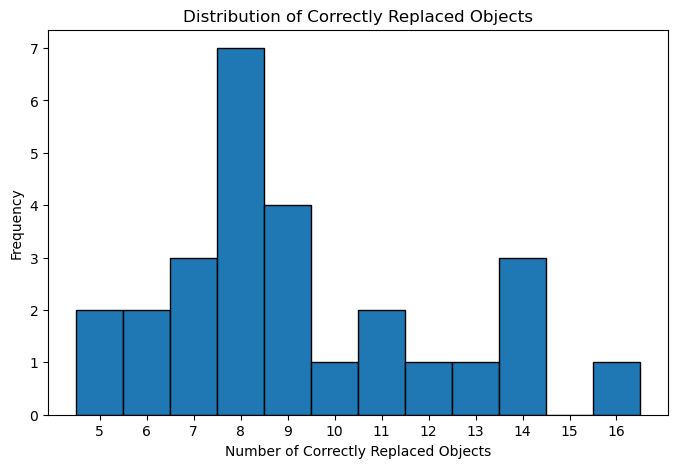

Summary Statistics:
Mean: 9.25925925925926
Median: 8.0
Standard Deviation: 2.9429523715086967


In [6]:
# Select the column of interest
correctly_replaced_objects = df['No. correct']

# Calculate basic statistics
mean_value = correctly_replaced_objects.mean()
median_value = correctly_replaced_objects.median()
std_deviation = correctly_replaced_objects.std()

# Calculate the range of data
data_range = correctly_replaced_objects.max() - correctly_replaced_objects.min()

# Calculate the number of bins for a 1-unit interval
num_bins = int(data_range) + 1

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 5))
plt.hist(correctly_replaced_objects, bins=num_bins, edgecolor='k', 
         range=(correctly_replaced_objects.min(), correctly_replaced_objects.max() + 1))
plt.title('Distribution of Correctly Replaced Objects')
plt.xlabel('Number of Correctly Replaced Objects')
plt.ylabel('Frequency')

# Calculate and set the positions of x-axis ticks at the middle of each interval
tick_positions = [value + 0.5 for value in range(int(correctly_replaced_objects.min()), int(correctly_replaced_objects.max()) + 1)]
plt.xticks(tick_positions, [str(int(pos - 0.5)) for pos in tick_positions])

# plt.grid(True)
plt.show()

# Print the summary statistics
print("Summary Statistics:")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")

About half (52%) of the subjects replaced 8 or fewer objects in the correct position. Only one person replaced more than 14 correctly.

Let's also look at Elderly group and Young group!

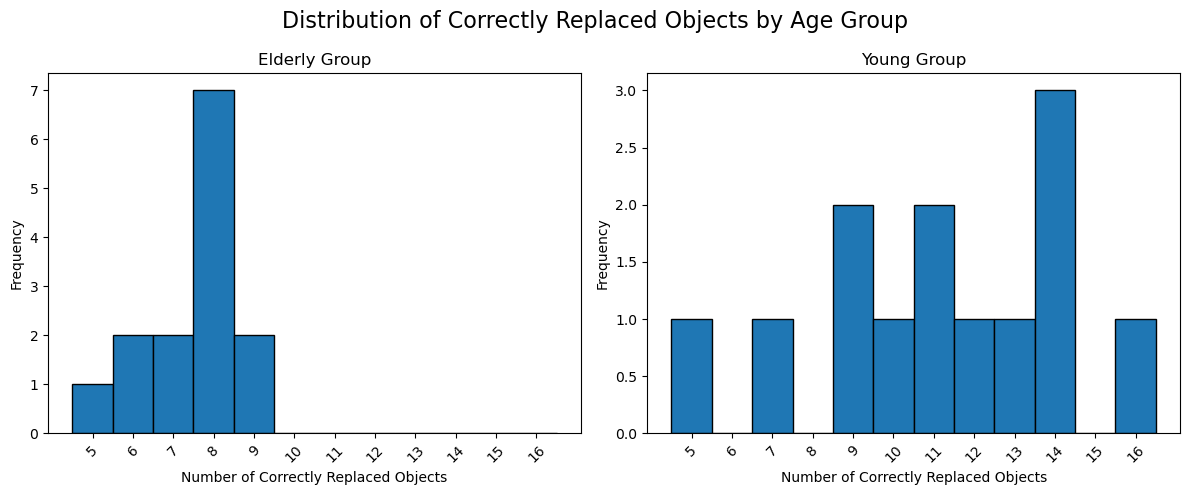

In [7]:
# Select the 'No. Correct' column for each age group
elderly_correct = df[df['Age group'] == 'Elderly']['No. correct']
young_correct = df[df['Age group'] == 'Young']['No. correct']

# Calculate basic statistics for each group
elderly_mean = elderly_correct.mean()
elderly_median = elderly_correct.median()
elderly_std_deviation = elderly_correct.std()

young_mean = young_correct.mean()
young_median = young_correct.median()
young_std_deviation = young_correct.std()

# Calculate the range of data for both groups
data_range = max(elderly_correct.max(), young_correct.max()) - min(elderly_correct.min(), young_correct.min())

# Calculate the number of bins for a 1-unit interval
num_bins = int(data_range) + 1

# Create a figure with two subplots (one for each group)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create histograms for both groups
axes[0].hist(elderly_correct, bins=num_bins, edgecolor='k', range=(min(elderly_correct.min(), young_correct.min()), max(elderly_correct.max(), young_correct.max()) + 1))
axes[1].hist(young_correct, bins=num_bins, edgecolor='k', range=(min(elderly_correct.min(), young_correct.min()), max(elderly_correct.max(), young_correct.max()) + 1))

# Set titles and labels for the subplots
axes[0].set_title('Elderly Group')
axes[0].set_xlabel('Number of Correctly Replaced Objects')
axes[0].set_ylabel('Frequency')

axes[1].set_title('Young Group')
axes[1].set_xlabel('Number of Correctly Replaced Objects')
axes[1].set_ylabel('Frequency')

# Calculate and set the positions of x-axis ticks at the middle of each interval
tick_positions = [value + 0.5 for value in range(int(min(elderly_correct.min(), young_correct.min())), int(max(elderly_correct.max(), young_correct.max())) + 1)]
tick_labels = [str(int(pos - 0.5)) for pos in tick_positions]

for ax in axes:
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=45)

# Set a title for the entire figure
fig.suptitle('Distribution of Correctly Replaced Objects by Age Group', fontsize=16)

plt.tight_layout()
plt.show()

### Q5. What does the frequency table tell you about the data? What are the modes?

According to the previous plots, on the whole the Elderly got fewer correct than the Young. All of the scores for the Elderly were under 10, with the mode at 8. The scores for the Young were more spread out and most were over 10 correct; the mode is 14.

### Q6. Describe the differences in (i) City block scores and (ii) Study times between the age groups.

In [8]:
# Filter the DataFrame for 'Elderly' and 'Young' age groups
elderly_data = df[df['Age group'] == 'Elderly']
young_data = df[df['Age group'] == 'Young']

# Calculate statistics for City block scores
city_block_mean_elderly = elderly_data['City block score'].mean()
city_block_mean_young = young_data['City block score'].mean()

city_block_std_elderly = elderly_data['City block score'].std()
city_block_std_young = young_data['City block score'].std()

# Calculate statistics for Study times
study_time_mean_elderly = elderly_data['Study time'].mean()
study_time_mean_young = young_data['Study time'].mean()

study_time_std_elderly = elderly_data['Study time'].std()
study_time_std_young = young_data['Study time'].std()

# Print and describe the differences in City block scores
print("City Block Scores:")
print(f"Mean for Elderly Group: {city_block_mean_elderly:.2f}")
print(f"Mean for Young Group: {city_block_mean_young:.2f}")
print(f"Standard Deviation for Elderly Group: {city_block_std_elderly:.2f}")
print(f"Standard Deviation for Young Group: {city_block_std_young:.2f}")

# Print and describe the differences in Study times
print("\nStudy Times:")
print(f"Mean for Elderly Group: {study_time_mean_elderly:.2f}")
print(f"Mean for Young Group: {study_time_mean_young:.2f}")
print(f"Standard Deviation for Elderly Group: {study_time_std_elderly:.2f}")
print(f"Standard Deviation for Young Group: {study_time_std_young:.2f}")


City Block Scores:
Mean for Elderly Group: 27.71
Mean for Young Group: 14.46
Standard Deviation for Elderly Group: 9.67
Standard Deviation for Young Group: 9.92

Study Times:
Mean for Elderly Group: 50.71
Mean for Young Group: 98.85
Standard Deviation for Elderly Group: 22.52
Standard Deviation for Young Group: 29.66


- (i) The City block scores are spread out for both age groups, with generally just one person in each category. Scores for the Young are generally lower than those for the Elderly.
- (ii) Study times for the Elderly are generally much lower than for the Young, with most of the former taking 55 seconds or less whilst all of the latter took 55 seconds or more.

### Q7. From the evidence above do you think that City Block Score or No. correct is better as a measurement of memory?

The number correct is a crude, but easy way of measuring spatial memory; it does not allow for “near- misses”. Comparing the Elderly and Young, the former do not get many repositions absolutely right. However, in the City block scores, although the Young group are generally better, some of the Elderly do just as well and some of the Young are just as poor as the Elderly. City block score seems to be a better method.

## Charts

**Introduction**

There is a commonly-held belief that it is more difficult for the elderly than for the young to learn and remember new material. In order to investigate spatial memory, a study was carried out on two groups of people, designated as Young (20-25) and Elderly (over 65). In the study, 18 objects were arranged randomly on a 10 x 10 grid. Thirteen young and fourteen elderly subjects were allowed to examine the positions of the objects for as long as they liked and were subsequently asked to recall these positions by replacing the objects on the grid. Their study times and two measures of recall performance were recorded.
The main objective of this worksheet is to compare the age groups visually by using charts.

### Q1. Describe the distribution of the number of correctly replaced objects (out of 18).

There were 18 objects to be correctly replaced on the grid; According to the plot in **Q4**, the highest score was 16 and the lowest 5. The most frequent number of objects replaced correctly (the
mode) is 8. Only 9 of the 27 subjects, i.e. one third, replaced more than half correctly.

### Q2. What does this tell you about the distribution of the number correct in the two groups?

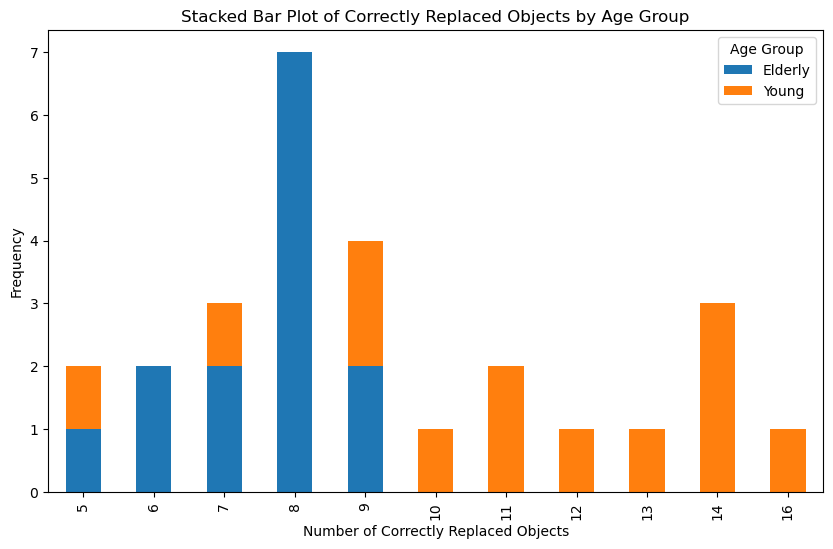

In [9]:
# Create a pivot table with 'No. correct' as values and 'Age group' as columns
pivot_table = df.pivot_table(index='No. correct', columns='Age group', aggfunc='size', fill_value=0)

# Create a stacked bar plot
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
ax.set_xlabel('Number of Correctly Replaced Objects')
ax.set_ylabel('Frequency')
ax.set_title('Stacked Bar Plot of Correctly Replaced Objects by Age Group')

# Set legend
ax.legend(title='Age Group', loc='upper right')

# Show the plot
plt.show()

All of those with more than half right were in the Young group. Scores for this group range from 5 to 16, although only two scored fewer than 9 correct. The Elderly group’s scores range from 5 to 9, with half of the group scoring 8 correct. The stacked bar chart shows clearly that the Young are more successful than the Elderly in replacing the objects correctly.

### Q3. Are these bar charts a good way of showing the differences between the age groups in City Block Scores and Study Times?

Not really, as there are blocks for each value that may not be evenly spaced. Also the default graphs have rather too many bars. The feature that does show clearly is that the Elderly generally take shorter Study Times than the Young but that their City Block Scores are generally poorer.

### Q4. Are Study Time or City Block Scores continuous variables?

Time is usually regarded as a continuous variable.

The City Block Scores, being the sums of blocks in horizontal and vertical directions are not. However, there are so many different values it is appropriate to group the data.

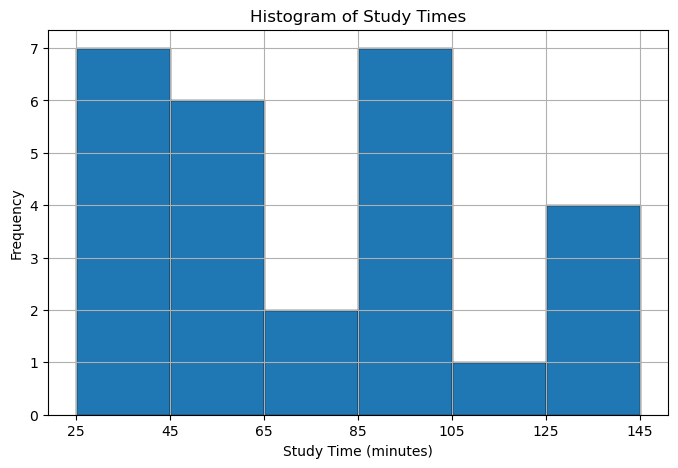

In [10]:
# Select the 'Study time' column
study_times = df['Study time']

# Define the bin edges based on your requirements
bin_edges = list(range(25, 146, 20))  # Start at 25, end at 145, with intervals of 20

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 5))
plt.hist(study_times, bins=bin_edges, edgecolor='k')
plt.title('Histogram of Study Times')
plt.xlabel('Study Time (minutes)')
plt.ylabel('Frequency')
plt.xticks(bin_edges)  # Set x-axis ticks to match bin edges
plt.grid(True)
plt.show()